In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Duplicate key in file PosixPath('/Users/mengfanjun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 266 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/mengfanjun/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 406 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [2]:
#用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
#用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [3]:
"""1、数据加载"""
#定义加载数据的文件名
filename = "../data_file/tjershoufang-v2.0.csv"
#自定义数据的行列索引（行索引使用pd默认的，列索引使用自定义的），此数组对应csv中从左到右的每一列
names = [
        "id","communityName","areaName","total","unitPriceValue",
        "fwhx","szlc","jzmj","hxjg","tnmj",
        "jzlx","fwcx","jzjg","zxqk","thbl",
        "pbdt","cqnx","gpsj","jyqs","scjy",
        "fwyt","fwnx","cqss","dyxx","fbbj",
        ]
#自定义需要处理的缺失值标记列表
miss_value = ["null","暂无数据"]
#数据类型会自动转换
#使用自定义的列名，跳过文件中的头行，处理缺失值列表标记的缺失值
df = pd.read_csv(filename,skiprows=[0],names=names,na_values=miss_value,error_bad_lines=False)
#print(df.info())

/var/folders/k6/76nx1z_x5ds0c9xxn6v8z67h0000gn/T/ipykernel_33712/2513543643.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename,skiprows=[0],names=names,na_values=miss_value,error_bad_lines=False)


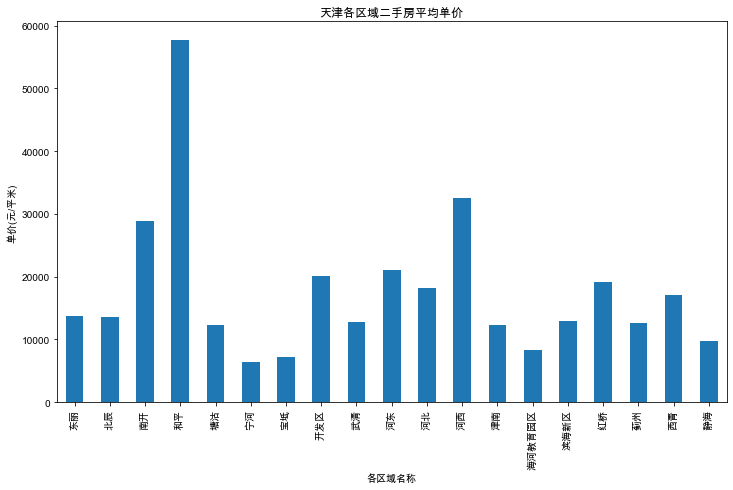

In [4]:
"""天津各区域二手房平均单价"""
#数据分组、数据运算和聚合
groups_unitprice_area = df["unitPriceValue"].groupby(df["areaName"])
mean_unitprice = groups_unitprice_area.mean()#计算一个数据集中 unitprice 和 area 列的平均值
mean_unitprice.index.name = "各区域名称"

#设置横纵坐标轴画出图像
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("单价(元/平米)")
ax.set_title("天津各区域二手房平均单价")
mean_unitprice.plot(kind="bar")
# plt.savefig('../data_ana/picture/mean_price.jpg')
plt.show()

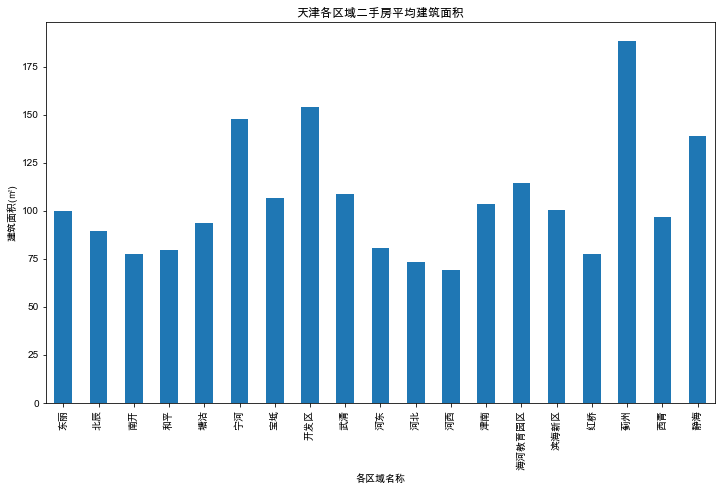

In [5]:
"""天津各区域二手房平均建筑面积"""
#数据运算
groups_area_jzmj = df["jzmj"].groupby(df["areaName"])#按照 df 数据框中的 areaName 列对 jzmj 列进行分组并计算每组的平均值
mean_jzmj = groups_area_jzmj.mean()
mean_jzmj.index.name = "各区域名称"

#数据可视化
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("建筑面积(㎡)")
ax.set_title("天津各区域二手房平均建筑面积")
mean_jzmj.plot(kind="bar")
# plt.savefig('../data_ana/picture/average_square.jpg')
plt.show()

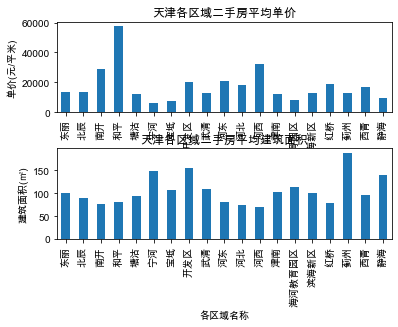

In [6]:
"""天津各区域平均单价和平均建筑面积"""
groups_unitprice_area = df["unitPriceValue"].groupby(df["areaName"])
mean_unitprice = groups_unitprice_area.mean()
mean_unitprice.index.name = ""

groups_area_jzmj = df["jzmj"].groupby(df["areaName"])
mean_jzmj = groups_area_jzmj.mean()
mean_jzmj.index.name = "各区域名称"

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.set_ylabel("单价(元/平米)")
ax1.set_title("天津各区域二手房平均单价")
ax2 = fig.add_subplot(2,1,2)
ax2.set_ylabel("建筑面积(㎡)")
ax2.set_title("天津各区域二手房平均建筑面积")
plt.subplots_adjust(hspace=0.4)

mean_unitprice.plot(kind="bar",ax=ax1)
mean_jzmj.plot(kind="bar",ax=ax2)
# plt.savefig('../data_ana/picture/average_square_average_price.jpg')
plt.show()

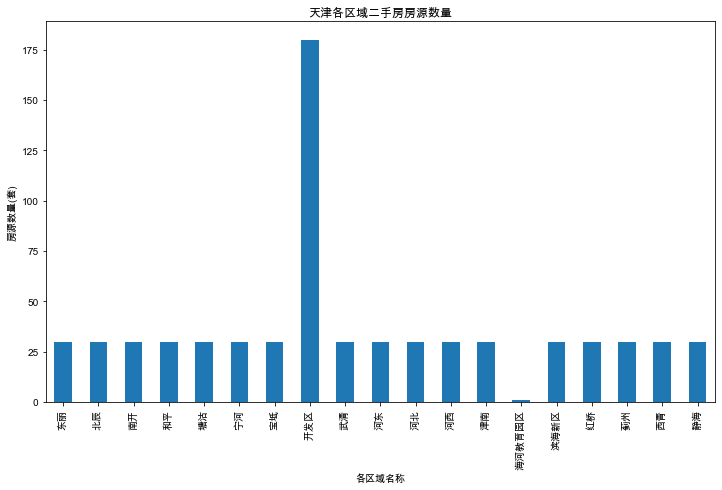

In [7]:
"""天津各区域二手房房源数量"""
groups_area = df["id"].groupby(df["areaName"])
count_area = groups_area.count()#用于计算一个数据集中按照 groups 列分组后，每个分组中 area 列的记录数
count_area.index.name = "各区域名称"

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("房源数量(套)")
ax.set_title("天津各区域二手房房源数量")
count_area.plot(kind="bar")
# plt.savefig('../data_ana/picture/house_source.jpg')
plt.show()

<AxesSubplot:title={'center':'天津二手房单价最高Top10'}, ylabel='单价(元/平米)'>

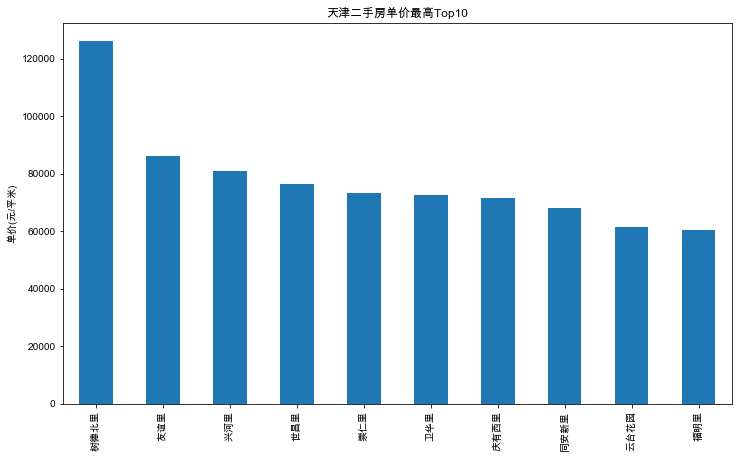

In [8]:
"""天津二手房单价最高Top10"""
unitprice_top = df.sort_values(by="unitPriceValue",ascending=False)[:10]#选择数据框中按照 unitPriceValue 列的值进行降序排序后的前 10 行数据
unitprice_top.set_index(unitprice_top["communityName"],inplace=True)#将 unitprice_top 数据框的 小区名字 列设置为索引列
unitprice_top.index.name = ""

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("单价(元/平米)")
ax.set_title("天津二手房单价最高Top10")
unitprice_top["unitPriceValue"].plot(kind="bar")
# plt.savefig('../data_ana/picture/price_top10.jpg')plt.show()

/var/folders/k6/76nx1z_x5ds0c9xxn6v8z67h0000gn/T/ipykernel_33712/3924809236.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_fwhx = count_fwhx.append(count_other_fwhx)


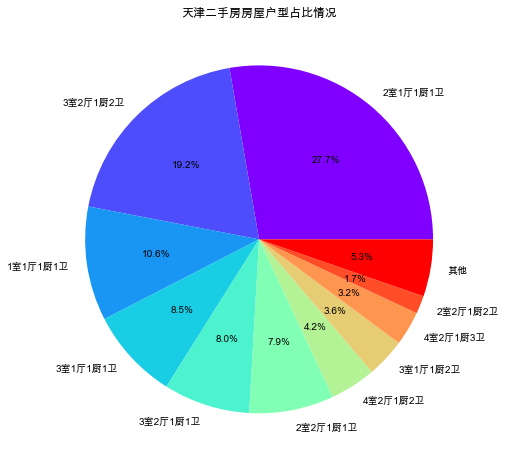

In [9]:
"""天津二手房房屋户型占比情况"""
count_fwhx = df['fwhx'].value_counts()[:10]#获取表格中房屋户型的列中出现频率最高的前10个值，并将它们存储在一个名为count_fwhx的变量中
count_other_fwhx = pd.Series({"其他":df['fwhx'].value_counts()[10:].count()})#除了前10个最高频率值之外的所有值的计数储存在这里
count_fwhx = count_fwhx.append(count_other_fwhx)#将count_other_fwhx这个对象合并到count_fwhx这个对象中
count_fwhx.index.name = ""
count_fwhx.name = ""
#画出饼图展示结果
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title("天津二手房房屋户型占比情况")
count_fwhx.plot(kind="pie",cmap=plt.cm.rainbow,autopct="%3.1f%%")

# plt.savefig('../data_ana/picture/house_catagory.jpg')
plt.show()

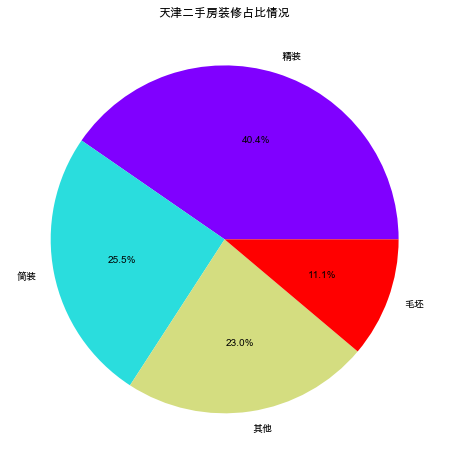

In [10]:
"""天津二手房房屋装修占比情况"""
count_zxqk = df["zxqk"].value_counts()#获取表格中装修情况的列中出现频率最高的前10个值，并将它们存储在一个名为count_zxqk的变量中
count_zxqk.name = ""

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title("天津二手房装修占比情况")
count_zxqk.plot(kind="pie",cmap=plt.cm.rainbow,autopct="%3.1f%%")
# plt.savefig('../data_ana/picture/house_maked.jpg')
plt.show()

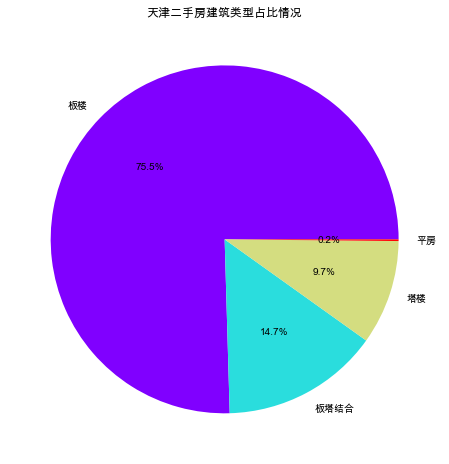

In [11]:
"""天津二手房建筑类型占比情况"""
count_jzlx = df["jzlx"].value_counts()#获取表格中建筑类型的列中出现频率最高的前10个值，并将它们存储在一个名为count_jzlx的变量中
count_jzlx.name = ""

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_title("天津二手房建筑类型占比情况")
count_jzlx.plot(kind="pie",cmap=plt.cm.rainbow,autopct="%3.1f%%")
# plt.savefig('../data_ana/picture/house_maked.jpg')
plt.show()

/var/folders/k6/76nx1z_x5ds0c9xxn6v8z67h0000gn/T/ipykernel_33712/2310453190.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_fwcx = count_fwcx.append(count_other_fwcx)


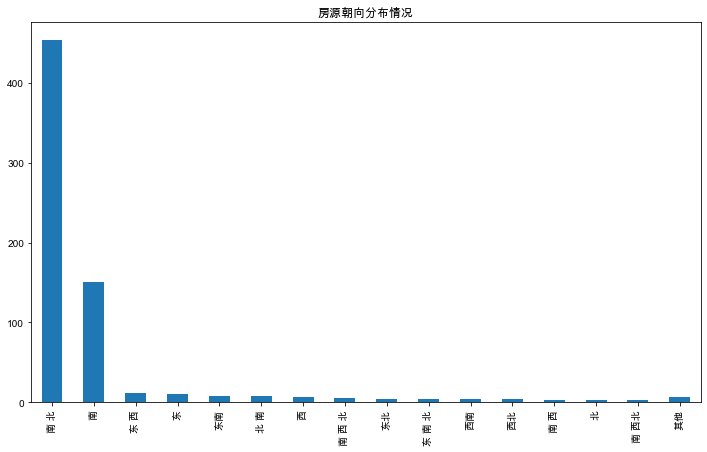

In [12]:
"""天津二手房房屋朝向分布情况"""
count_fwcx = df["fwcx"].value_counts()[:15]#获取表格中名为房屋朝向的列中出现频率最高的前15个值，并将它们存储在一个名为count_fwcx的变量中
count_other_fwcx = pd.Series({"其他":df['fwcx'].value_counts()[15:].count()})#包含一个名为“其他”的标签，以及在DataFrame中除了前15个最高频率值之外的所有值的计数
count_fwcx = count_fwcx.append(count_other_fwcx)#合并到一起

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("房源朝向分布情况")
count_fwcx.plot(kind="bar")
#plt.savefig('../data_ana/picture/house_towards.jpg')
plt.show()

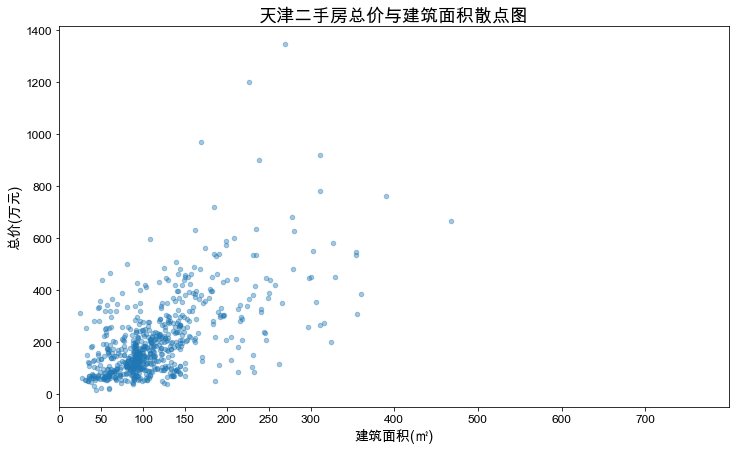

In [13]:
"""天津二手房总价与建筑面积散点图"""
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_title("天津二手房总价与建筑面积散点图",fontsize=18)
df.plot(x="jzmj", y="total", kind="scatter",fontsize=12,ax=ax,alpha=0.4,xticks=[0,50,100,150,200,250,300,400,500,600,700],xlim=[0,800])
ax.set_xlabel("建筑面积(㎡)",fontsize=14)
ax.set_ylabel("总价(万元)",fontsize=14)

# plt.savefig('../data_ana/picture/total_squaer_dot.jpg')
plt.show()

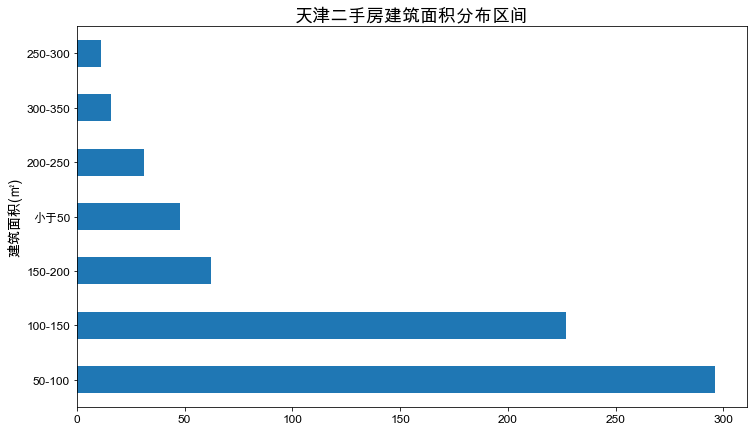

In [15]:
"""天津二手房建筑面积分布区间"""
area_level = [0, 50, 100, 150, 200, 250, 300, 500]    
label_level = ['小于50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350']    
jzmj_cut = pd.cut(df["jzmj"], area_level, labels=label_level) #它用于将一个名为建筑面积的列按照指定的区间划分成不同的类别，并将这些类别赋值给每个值       
jzmj_result = jzmj_cut.value_counts()#对一个名为 jzmj_cut 的数据进行计数
#jzmj_result = jzmj_result.sort_values()

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
ax.set_ylabel("建筑面积(㎡)",fontsize=14)
ax.set_title("天津二手房建筑面积分布区间",fontsize=18)
jzmj_result.plot(kind="barh",fontsize=12)
#plt.savefig('../data_ana/picture/house_square.jpg')
plt.show()

In [17]:
from wordcloud import WordCloud
import jieba
# from scipy.misc import imread
from matplotlib.pyplot import imread

In [18]:
"""天津二手房数据词云"""
#基础配置数据
filename = "../data_file/tjershoufang-v1.0.csv"
backpicture = "../resources/house2.jpg"
savepicture = "../data_ana/picture/天津二手房数据词云1.png"
fontpath = "../resources/HONORSansCN-Medium.ttf"
stopwords = ["null","暂无","数据","上传","照片","房本"]

In [19]:
#读入数据文件
comment_text = open(filename,encoding="utf-8").read()  
# 读取背景图片
color_mask = imread(backpicture) 

In [20]:
#结巴分词,同时剔除掉不需要的词汇    
ershoufang_words = jieba.cut(comment_text)
ershoufang_words = [word for word in ershoufang_words if word not in stopwords]#它用于从 ershoufang_words 列表中过滤掉停用词（stopwords）
cut_text = " ".join(ershoufang_words) 

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/k6/76nx1z_x5ds0c9xxn6v8z67h0000gn/T/jieba.cache
Loading model cost 0.413 seconds.
Prefix dict has been built successfully.


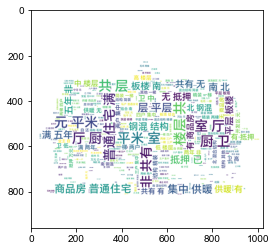

In [24]:
#设置词云格式
cloud = WordCloud(
    #设置字体，不指定就会出现乱码
    font_path=fontpath,
    #设置背景色
    background_color='white',
    #词云形状
    mask=color_mask,
    #允许最大词汇
    max_words=2000,
    #最大号字体
    max_font_size=60
   )
# 产生词云
word_cloud = cloud.generate(cut_text) 
#保存图片
#word_cloud.to_file(savepicture)
plt.imshow(word_cloud)